In [1]:
# fetching bert model from hugging face
# import required pacakges
from sentence_transformers import SentenceTransformer
import numpy as np
import torch
import torch.nn.functional as F
import pandas as pd

In [2]:
# Read Text_Similarity_Dataset.csv. 
dataset = pd.read_csv("Text_Similarity_Dataset.csv")
print(f"shape of dataset : {dataset.shape}")
# print first 3 rows from the dataframe.
dataset.head(3)

shape of dataset : (4023, 3)


,Unique_ID,text1,text2
0,0,savvy searchers fail to spot ads internet sear...,newcastle 2-1 bolton kieron dyer smashed home ...
1,1,millions to miss out on the net by 2025 40% o...,nasdaq planning $100m share sale the owner of ...
2,2,young debut cut short by ginepri fifteen-year-...,ruddock backs yapp s credentials wales coach m...


In [3]:
# print text1 value of 1st row
print(dataset['text1'][2284])

dvd copy protection strengthened dvds will be harder to copy thanks to new anti-piracy measures devised by copy protection firm macrovision.  the pirated dvd market is enormous because current copy protection was hacked more than five years ago. macrovision says its new ripguard technology will thwart most  but not all  of the current dvd ripping (copying) programs used to pirate dvds.  ripguard is designed to... reduce dvd ripping and the resulting supply of illegal peer to peer   said the firm. macrovision said the new technology will work in  nearly all  current dvd players when applied to the discs  but it did not specify how many machines could have a problem with ripguard. some bbc news website users have expressed concerns that the new technology will mean that dvds will not work on pcs running the operating system linux. the new technology will be welcomed by hollywood film studios which are increasingly relying on revenue from dvd sales.  the film industry has stepped up effor

In [4]:
# print text2 value of 1st row
print(dataset['text2'][2284])

dvd copy protection strengthened dvds will be harder to copy thanks to new anti-piracy measures devised by copy protection firm macrovision.  the pirated dvd market is enormous because current copy protection was hacked more than five years ago. macrovision says its new ripguard technology will thwart most  but not all  of the current dvd ripping (copying) programs used to pirate dvds.  ripguard is designed to... reduce dvd ripping and the resulting supply of illegal peer to peer   said the firm. macrovision said the new technology will work in  nearly all  current dvd players when applied to the discs  but it did not specify how many machines could have a problem with ripguard. the new technology will be welcomed by hollywood film studios which are increasingly relying on revenue from dvd sales.  the film industry has stepped up efforts to fight dvd piracy in the last 12 months  taking legal action against websites which offer pirated copies of dvd movies for download.   ultimately  w

In [5]:
print(len(dataset))

4023


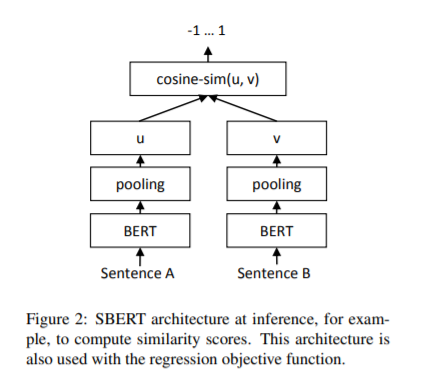

<mark>BERT pretraining, which includes a careful evaluation of the effects of hyperparmeter tuning and training set size. BERT was significantly undertrained and propose an improved recipe for training BERT models, which we call RoBERTa, that can match or exceed the performance of all of the post-BERT methods.
Our modifications are simple, they include:
training the model longer, with bigger batches, over more data; 
removing the next sentence prediction objective; 
training on longer sequences; and 
dynamically changing the masking pattern applied to the training data. 
    RoBERTa for Robustly optimized BERT approach. Specifically, RoBERTa is trained with dynamic masking, FULL SENTENCES without NSP loss, large mini-batches and a larger byte-level BPE.</mark>

In [6]:
# using mpnet architecture for transformer model.
model = SentenceTransformer('stsb-roberta-large')

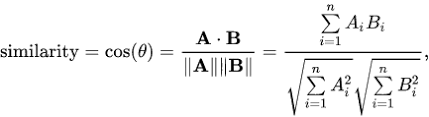

In [14]:
# return the result in the range of 0 to 1
def cosine_similarity(para1_embedding, para2_embedding):
#     if the embedding is not in tensor convert it to tensor
    if not isinstance(para1_embedding, torch.Tensor):
        para1_embedding = torch.tensor(para1_embedding)
    if not isinstance(para2_embedding, torch.Tensor):
        para2_embedding = torch.tensor(para2_embedding)
#     unsqueeze the tensor for easy dot product
    if len(para1_embedding.shape) == 1:
        para1_embedding = para1_embedding.unsqueeze(0)
    if len(para2_embedding.shape) == 1:
        para2_embedding = para2_embedding.unsqueeze(0)
#     normalize the embedding
    para1_norm = F.normalize(para1_embedding)
    para2_norm = F.normalize(para2_embedding)
#     dot product of two normalized embeddings.
    res = torch.mm(para1_norm, para2_norm.transpose(0,1))
#     rearanging the range of output 0 for dissimilar and 1 for similarity
    return (res-(-1))/(1 - (-1))

In [8]:
def compute_similarity(para1, para2):
    emdedding1 = model.encode(para1, convert_to_tensor=True)
    embedding2 = model.encode(para2, convert_to_tensor=True)
#     we just take embeddings for paragraph1 and paragraph2. Polling will be done by model itself.
#     pass both embedding to cosine_similarity for calculating the similarity between the embedding. 
    cosine_score = cosine_similarity(emdedding1, embedding2)
    return cosine_score

In [16]:
# checking some sentences with our model
sentence1 = "Rooney is very good football player"
sentence2 = "Rooney scored highest goal in the season"
print(f"\n{sentence1}\n{sentence2}\ncosine similarity : {compute_similarity(sentence1, sentence2)}")
sentence2 = "I am having my dinner"
print(f"\n{sentence1}\n{sentence2}\ncosine similarity : {compute_similarity(sentence1, sentence2).item()}")


Rooney is very good football player
Rooney scored highest goal in the season
cosine similarity : tensor([[0.8587]], device='cuda:0')

Rooney is very good football player
I am having my dinner
cosine similarity : 0.4822092652320862


In [10]:
# creating a list where we will store the similarity value
similarity_list = []
# interating thourgh all rows of dataset
for ind in range(len(dataset)):
#     getting 1st paragraph from the following row
    para1 = dataset['text1'][ind] 
#     getting 2nd paragraph from the following row 
    para2 = dataset['text2'][ind]
#     calcute the similatiry between two paragraphs
    res = compute_similarity(para1, para2)
#     adding a similarity score in the list
    similarity_list.append(res.item())

In [11]:
# creating a data fram having two fields('Unique_ID' and "similarity_score") which indicate the its recpective values
similarity_scores = pd.DataFrame({'Unique_ID' : dataset.Unique_ID,
                                 "Similarity_Score" : similarity_list})
# printing first 3 result from the dataframe
similarity_scores.head(3)

,Unique_ID,Similarity_Score
0,0,0.614219
1,1,0.640837
2,2,0.788034


In [12]:
# saving the data frame in csv file format without adding its index
similarity_scores.to_csv("final_similarity_scores.csv", index=False)